In [2]:
#1a

def summation_unit(inputs, weights):

    #Compute the weighted sum of inputs.
    # inputs: List of input values.
    # weights: List of corresponding weights.
    # return: Weighted sum of inputs.

    if len(inputs) != len(weights):
        raise ValueError("The number of inputs must match the number of weights.")
    
    weighted_sum = sum(i * w for i, w in zip(inputs, weights))
    return weighted_sum

# Inputs and corresponding weights
inputs = [0.5, -0.2, 0.8]
weights = [0.4, 0.7, -0.5]

# Compute the weighted sum
weighted_sum = summation_unit(inputs, weights)

# Output the result
print(f"Weighted Sum: {weighted_sum}")


Weighted Sum: -0.33999999999999997


In [6]:
#1b

import math

def step_function(x):
    # Step activation function.
    # :param x: Input value.
    # :return: 1 if x >= 0, else 0.
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    #Bipolar Step activation function.
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    #Sigmoid activation function.
    return 1 / (1 + math.exp(-x))

def tanh_function(x):
    #Hyperbolic tangent activation function
    return math.tanh(x)

def relu_function(x):
    #ReLU (Rectified Linear Unit) activation function
    return max(0, x)

def leaky_relu_function(x, alpha=0.01):
    #Leaky ReLU activation function
    return x if x >= 0 else alpha * x

# Input to the activation function (weighted sum)
x = 0.3

# Apply Step activation function
output_step = step_function(x)
print(f"Step Function Output: {output_step}")

# Apply Sigmoid activation function
output_sigmoid = sigmoid_function(x)
print(f"Sigmoid Function Output: {output_sigmoid}")

# Apply ReLU activation function
output_relu = relu_function(x)
print(f"ReLU Function Output: {output_relu}")

# Apply TanH activation function
output_tanh = tanh_function(x)
print(f"TanH Function Output: {output_tanh}")



Step Function Output: 1
Sigmoid Function Output: 0.574442516811659
ReLU Function Output: 0.3
TanH Function Output: 0.2913126124515909


In [8]:
#1c
def mean_squared_error(predictions, targets):
    #Compute Mean Squared Error (MSE)
    if len(predictions) != len(targets):
        raise ValueError("The number of predictions must match the number of targets.")
    
    mse = sum((p - t) ** 2 for p, t in zip(predictions, targets)) / len(predictions)
    return mse

def mean_absolute_error(predictions, targets):
    #Compute Mean Absolute Error (MAE)
    if len(predictions) != len(targets):
        raise ValueError("The number of predictions must match the number of targets.")
    
    mae = sum(abs(p - t) for p, t in zip(predictions, targets)) / len(predictions)
    return mae

def binary_cross_entropy(predictions, targets):
    #Compute Binary Cross-Entropy
    if len(predictions) != len(targets):
        raise ValueError("The number of predictions must match the number of targets.")
    
    epsilon = 1e-12  # To avoid log(0)
    predictions = [min(max(p, epsilon), 1 - epsilon) for p in predictions]
    
    bce = -sum(t * math.log(p) + (1 - t) * math.log(1 - p) for p, t in zip(predictions, targets)) / len(predictions)
    return bce

# Predicted and actual target values
predictions = [2.5, 0.0, 2.1, 7.8]
targets = [3.0, -0.5, 2.0, 7.5]

# Calculate Mean Squared Error
mse = mean_squared_error(predictions, targets)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(predictions, targets)
print(f"Mean Absolute Error: {mae}")

# Predicted probabilities and actual target values
predictions = [0.8, 0.4, 0.7, 0.1]
targets = [1, 0, 1, 0]

# Calculate Binary Cross-Entropy
bce = binary_cross_entropy(predictions, targets)
print(f"Binary Cross-Entropy: {bce}")



Mean Squared Error: 0.14999999999999997
Mean Absolute Error: 0.35
Binary Cross-Entropy: 0.2990011586691898


Convergence reached at epoch 130


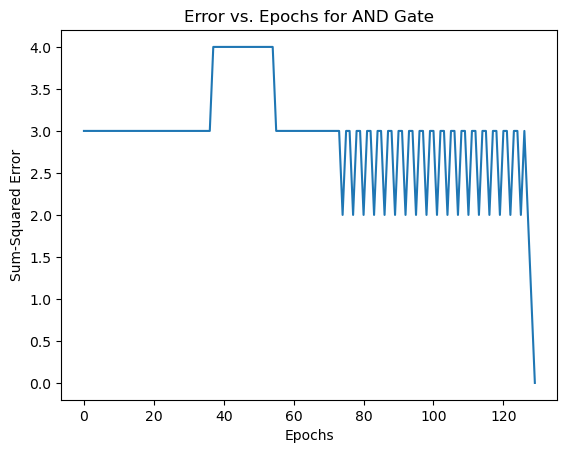

Final Weights: [-0.1   0.1   0.05]


In [10]:
#2

import numpy as np
import matplotlib.pyplot as plt

def train_perceptron(X, y, W, learning_rate, epochs, convergence_threshold):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            weighted_sum = np.dot(xi, W[1:]) + W[0]  # Summation including bias
            prediction = step_function(weighted_sum)
            error = target - prediction
            total_error += error ** 2
            W[1:] += learning_rate * error * xi  # Update weights
            W[0] += learning_rate * error  # Update bias
        
        errors.append(total_error)
        if total_error <= convergence_threshold:
            print(f"Convergence reached at epoch {epoch + 1}")
            break

    return W, errors

# Input for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate output

# Initial weights
W = np.array([10, 0.2, -0.75])  # [Bias, W1, W2]

# Parameters
learning_rate = 0.05
epochs = 1000
convergence_threshold = 0.002

# Train the perceptron
final_weights, errors = train_perceptron(X, y, W, learning_rate, epochs, convergence_threshold)

# Plot the errors vs. epochs
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error vs. Epochs for AND Gate')
plt.show()

print(f"Final Weights: {final_weights}")


Convergence reached at epoch 390


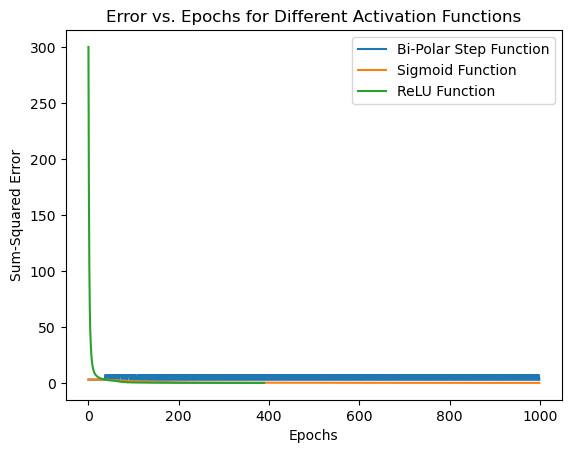

Final Weights using Bi-Polar Step Function: [-0.1   0.1   0.05]
Final Weights using Sigmoid Function: [-6.13531308  3.97083321  3.96394835]
Final Weights using ReLU Function: [-0.92774472  0.95116001  0.94981086]


In [14]:
#3
def train_perceptron(X, y, W, learning_rate, epochs, convergence_threshold, activation_function):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            weighted_sum = np.dot(xi, W[1:]) + W[0]  # Summation including bias
            prediction = activation_function(weighted_sum)
            error = target - prediction
            total_error += error ** 2
            W[1:] += learning_rate * error * xi  # Update weights
            W[0] += learning_rate * error  # Update bias
        
        errors.append(total_error)
        if total_error <= convergence_threshold:
            print(f"Convergence reached at epoch {epoch + 1}")
            break

    return W, errors

# Input for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate output

# Initial weights
W = np.array([10, 0.2, -0.75])  # [Bias, W1, W2]

# Parameters
learning_rate = 0.05
epochs = 1000
convergence_threshold = 0.002

import matplotlib.pyplot as plt

# Train with Bi-Polar Step function
final_weights_bipolar, errors_bipolar = train_perceptron(
    X, y, W.copy(), learning_rate, epochs, convergence_threshold, bipolar_step_function)

# Train with Sigmoid function
final_weights_sigmoid, errors_sigmoid = train_perceptron(
    X, y, W.copy(), learning_rate, epochs, convergence_threshold, sigmoid_function)

# Train with ReLU function
final_weights_relu, errors_relu = train_perceptron(
    X, y, W.copy(), learning_rate, epochs, convergence_threshold, relu_function)

# Plot the errors vs. epochs for all activation functions
plt.plot(errors_bipolar, label='Bi-Polar Step Function')
plt.plot(errors_sigmoid, label='Sigmoid Function')
plt.plot(errors_relu, label='ReLU Function')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error vs. Epochs for Different Activation Functions')
plt.legend()
plt.show()

print(f"Final Weights using Bi-Polar Step Function: {final_weights_bipolar}")
print(f"Final Weights using Sigmoid Function: {final_weights_sigmoid}")
print(f"Final Weights using ReLU Function: {final_weights_relu}")


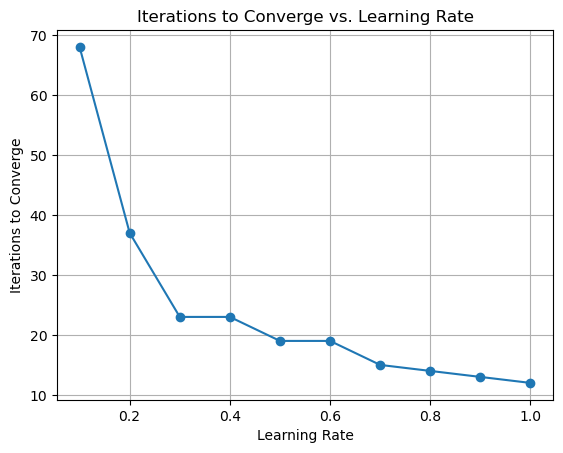

In [16]:
#4
def train_perceptron_iterations(X, y, W, learning_rate, epochs, convergence_threshold, activation_function):
    for epoch in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            weighted_sum = np.dot(xi, W[1:]) + W[0]  # Summation including bias
            prediction = activation_function(weighted_sum)
            error = target - prediction
            total_error += error ** 2
            W[1:] += learning_rate * error * xi  # Update weights
            W[0] += learning_rate * error  # Update bias
        
        if total_error <= convergence_threshold:
            return epoch + 1  # Return the epoch count if convergence is achieved
    
    return epochs  # Return maximum epochs if convergence is not achieved

# Input for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND gate output

# Initial weights
initial_W = np.array([10, 0.2, -0.75])  # [Bias, W1, W2]

# Parameters
epochs = 1000
convergence_threshold = 0.002
activation_function = step_function  # Use step function as activation

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
iterations_to_converge = []

for lr in learning_rates:
    W = initial_W.copy()  # Reset weights to initial values
    iterations = train_perceptron_iterations(X, y, W, lr, epochs, convergence_threshold, activation_function)
    iterations_to_converge.append(iterations)

# Plot the learning rate vs. iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs. Learning Rate')
plt.grid(True)
plt.show()


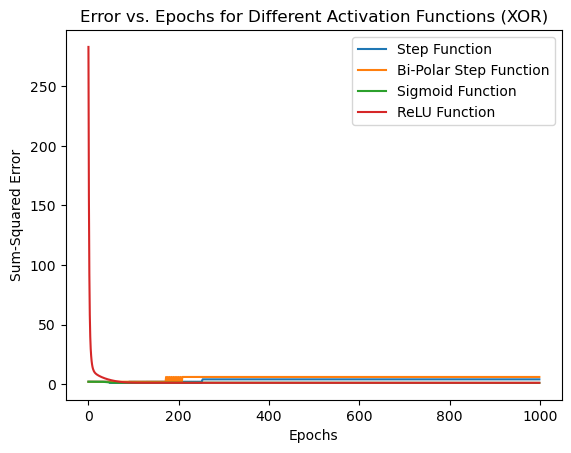

Final Weights using Step Function: [ 0.1 -0.1 -0.1]
Final Weights using Bi-Polar Step Function: [ 0.2  -0.1  -0.15]
Final Weights using Sigmoid Function: [ 0.02876923 -0.05348673 -0.02819591]
Final Weights using ReLU Function: [ 0.52631579 -0.05263158 -0.02631579]


In [18]:
#5
import numpy as np

# XOR gate input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR gate output

# Initial weights
initial_W = np.array([10, 0.2, -0.75])  # [Bias, W1, W2]

# Parameters
epochs = 1000
convergence_threshold = 0.002
learning_rate = 0.05

# Step function
def step_function(x):
    return 1 if x >= 0 else 0

# Bi-Polar Step function
def bipolar_step_function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

# Sigmoid function
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu_function(x):
    return max(0, x)

def train_perceptron(X, y, W, learning_rate, epochs, convergence_threshold, activation_function):
    errors = []
    for epoch in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            weighted_sum = np.dot(xi, W[1:]) + W[0]  # Summation including bias
            prediction = activation_function(weighted_sum)
            error = target - prediction
            total_error += error ** 2
            W[1:] += learning_rate * error * xi  # Update weights
            W[0] += learning_rate * error  # Update bias
        
        errors.append(total_error)
        if total_error <= convergence_threshold:
            print(f"Convergence reached at epoch {epoch + 1}")
            break

    return W, errors

# Run experiments with different activation functions

# Step function
W_step, errors_step = train_perceptron(X, y, initial_W.copy(), learning_rate, epochs, convergence_threshold, step_function)

# Bi-Polar Step function
W_bipolar, errors_bipolar = train_perceptron(X, y, initial_W.copy(), learning_rate, epochs, convergence_threshold, bipolar_step_function)

# Sigmoid function
W_sigmoid, errors_sigmoid = train_perceptron(X, y, initial_W.copy(), learning_rate, epochs, convergence_threshold, sigmoid_function)

# ReLU function
W_relu, errors_relu = train_perceptron(X, y, initial_W.copy(), learning_rate, epochs, convergence_threshold, relu_function)

# Plot the errors vs. epochs for all activation functions
import matplotlib.pyplot as plt

plt.plot(errors_step, label='Step Function')
plt.plot(errors_bipolar, label='Bi-Polar Step Function')
plt.plot(errors_sigmoid, label='Sigmoid Function')
plt.plot(errors_relu, label='ReLU Function')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.title('Error vs. Epochs for Different Activation Functions (XOR)')
plt.legend()
plt.show()

print(f"Final Weights using Step Function: {W_step}")
print(f"Final Weights using Bi-Polar Step Function: {W_bipolar}")
print(f"Final Weights using Sigmoid Function: {W_sigmoid}")
print(f"Final Weights using ReLU Function: {W_relu}")


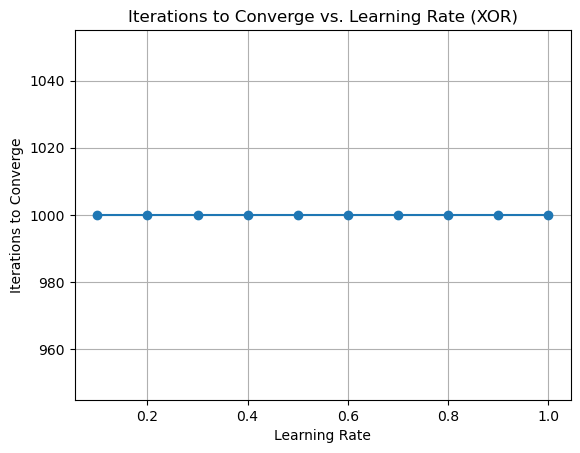

In [20]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
iterations_to_converge = []

for lr in learning_rates:
    W = initial_W.copy()  # Reset weights to initial values
    iterations = train_perceptron_iterations(X, y, W, lr, epochs, convergence_threshold, step_function)
    iterations_to_converge.append(iterations)

# Plot the learning rate vs. iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs. Learning Rate (XOR)')
plt.grid(True)
plt.show()


In [2]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)

# Function to train the perceptron
def train_perceptron(X, y, learning_rate, epochs):
    np.random.seed(1)  # for consistent results
    weights = np.random.rand(X.shape[1])  # initialize weights randomly
    bias = np.random.rand(1)  # initialize bias randomly
    
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], weights) + bias  # linear combination
            predicted = sigmoid(linear_output)  # apply sigmoid function
            
            # Calculate the error
            error = y[i] - predicted  
            
            # Update weights and bias using gradient descent
            weights += learning_rate * error * sigmoid_derivative(predicted) * X[i]
            bias += learning_rate * error * sigmoid_derivative(predicted)
    
    return weights, bias

# Function to predict the output for new inputs
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias  # linear combination
    return sigmoid(linear_output)  # apply sigmoid function

# Prepare the dataset
def prepare_data():
    # Input data: [Candies, Mangoes, Milk Packets, Payment]
    X = np.array([
        [20, 6, 2, 386],
        [16, 3, 6, 289],
        [27, 6, 2, 393],
        [19, 1, 2, 110],
        [24, 4, 2, 280],
        [22, 1, 5, 167],
        [15, 4, 2, 271],
        [18, 4, 2, 274],
        [21, 4, 4, 148],
        [16, 2, 4, 198]
    ])
    
    # Output data: 1 for 'Yes' (High Value Tx), 0 for 'No'
    y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
    
    return X, y

# Main function
if __name__ == "__main__":
    # Prepare data
    X, y = prepare_data()
    
    # Hyperparameters
    learning_rate = 0.1  # initialize learning rate
    epochs = 10000  # number of training iterations
    
    # Train the perceptron
    weights, bias = train_perceptron(X, y, learning_rate, epochs)
    
    # Predict for new data
    predictions = predict(X, weights, bias)
    
    # Convert predictions to binary values (0 or 1)
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
    
    # Print the final predictions
    print(f"Predictions: {binary_predictions}")

Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
import numpy as np

# Pseudo-inverse method
def pseudo_inverse_method(X, y):
    X_pseudo_inverse = np.linalg.pinv(X)  # Compute the pseudo-inverse of X
    weights = np.dot(X_pseudo_inverse, y)  # Compute weights using pseudo-inverse
    return weights


# Main function
if __name__ == "__main__":
    # Prepare data
    X, y = prepare_data()
    
    # Compute weights using pseudo-inverse method
    weights_pseudo_inverse = pseudo_inverse_method(X, y)
    
    # Predict using pseudo-inverse (no bias term needed as it's included in pseudo-inverse calculation)
    predictions_pseudo_inverse = np.dot(X, weights_pseudo_inverse)
    binary_predictions_pseudo_inverse = [1 if p >= 0.5 else 0 for p in predictions_pseudo_inverse]
    
    # Print the comparison results
    print("Perceptron Predictions:", binary_predictions)
    print("Pseudo-inverse Predictions:", binary_predictions_pseudo_inverse)

Perceptron Predictions: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Pseudo-inverse Predictions: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0]


In [12]:
import numpy as np

# Function to train the neural network using backpropagation
def train_neural_network(X, y, learning_rate, epochs, error_threshold):
    # Initialize weights randomly
    np.random.seed(1)
    v = np.random.rand(2, 2)  # weights between input layer and hidden layer
    w = np.random.rand(2, 1)  # weights between hidden layer and output layer
    
    for epoch in range(epochs):
        # Feedforward pass
        # Hidden layer input and output
        hidden_input = np.dot(X, v)
        hidden_output = sigmoid(hidden_input)
        
        # Output layer input and output
        final_input = np.dot(hidden_output, w)
        final_output = sigmoid(final_input)
        
        # Calculate error
        error = y - final_output
        
        # Check for convergence
        if np.mean(np.abs(error)) <= error_threshold:
            print(f"Convergence achieved at epoch {epoch}")
            break
        
        # Backpropagation
        # Calculate gradients for output layer (w)
        delta_output = error * sigmoid_derivative(final_output)
        w_adjustments = np.dot(hidden_output.T, delta_output) * learning_rate
        
        # Calculate gradients for hidden layer (v)
        delta_hidden_layer = np.dot(delta_output, w.T) * sigmoid_derivative(hidden_output)
        v_adjustments = np.dot(X.T, delta_hidden_layer) * learning_rate
        
        # Update weights
        w += w_adjustments
        v += v_adjustments
    
    return v, w, epoch

# Function to predict using the trained neural network
def predict(X, v, w):
    hidden_input = np.dot(X, v)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w)
    final_output = sigmoid(final_input)
    return final_output

# AND gate logic input and output
def prepare_and_data():
    # Input for AND gate
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    
    # Output for AND gate (0, 0, 0, 1)
    y = np.array([[0], [0], [0], [1]])
    
    return X, y

# Main function
if __name__ == "__main__":
    # Prepare AND gate data
    X, y = prepare_and_data()
    
    # Hyperparameters
    learning_rate = 0.05
    epochs = 1000
    error_threshold = 0.002
    
    # Train the neural network
    v, w, total_epochs = train_neural_network(X, y, learning_rate, epochs, error_threshold)
    
    # Test the network on the AND gate data
    predictions = predict(X, v, w)
    
    # Binary predictions based on threshold 0.5
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
    
    # Print results
    print(f"Final Predictions after {total_epochs} epochs: {binary_predictions}")

Final Predictions after 999 epochs: [0, 0, 0, 0]


In [14]:
import numpy as np

# Function to train the neural network using backpropagation
def train_neural_network(X, y, learning_rate, epochs, error_threshold):
    # Initialize weights randomly
    np.random.seed(1)
    v = np.random.rand(2, 2)  # weights between input layer and hidden layer
    w = np.random.rand(2, 1)  # weights between hidden layer and output layer
    
    for epoch in range(epochs):
        # Feedforward pass
        # Hidden layer input and output
        hidden_input = np.dot(X, v)
        hidden_output = sigmoid(hidden_input)
        
        # Output layer input and output
        final_input = np.dot(hidden_output, w)
        final_output = sigmoid(final_input)
        
        # Calculate error
        error = y - final_output
        
        # Check for convergence
        if np.mean(np.abs(error)) <= error_threshold:
            print(f"Convergence achieved at epoch {epoch}")
            break
        
        # Backpropagation
        # Calculate gradients for output layer (w)
        delta_output = error * sigmoid_derivative(final_output)
        w_adjustments = np.dot(hidden_output.T, delta_output) * learning_rate
        
        # Calculate gradients for hidden layer (v)
        delta_hidden_layer = np.dot(delta_output, w.T) * sigmoid_derivative(hidden_output)
        v_adjustments = np.dot(X.T, delta_hidden_layer) * learning_rate
        
        # Update weights
        w += w_adjustments
        v += v_adjustments
    
    return v, w, epoch

# Function to predict using the trained neural network
def predict(X, v, w):
    hidden_input = np.dot(X, v)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w)
    final_output = sigmoid(final_input)
    return final_output

# XOR gate logic input and output
def prepare_xor_data():
    # Input for XOR gate
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    
    # Output for XOR gate (0, 1, 1, 0)
    y = np.array([[0], [1], [1], [0]])
    
    return X, y

# Main function
if __name__ == "__main__":
    # Prepare XOR gate data
    X, y = prepare_xor_data()
    
    # Hyperparameters
    learning_rate = 0.05
    epochs = 1000
    error_threshold = 0.002
    
    # Train the neural network
    v, w, total_epochs = train_neural_network(X, y, learning_rate, epochs, error_threshold)
    
    # Test the network on the XOR gate data
    predictions = predict(X, v, w)
    
    # Binary predictions based on threshold 0.5
    binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]
    
    # Print results
    print(f"Final Predictions after {total_epochs} epochs: {binary_predictions}")

Final Predictions after 999 epochs: [1, 1, 1, 1]


In [16]:
import numpy as np

# Function to train the neural network using backpropagation
def train_neural_network(X, y, learning_rate, epochs, error_threshold):
    # Initialize weights randomly
    np.random.seed(1)
    v = np.random.rand(2, 2)  # weights between input layer and hidden layer
    w = np.random.rand(2, 2)  # weights between hidden layer and 2 output neurons
    
    for epoch in range(epochs):
        # Feedforward pass
        hidden_input = np.dot(X, v)  # hidden layer input
        hidden_output = sigmoid(hidden_input)  # hidden layer output
        
        final_input = np.dot(hidden_output, w)  # output layer input
        final_output = sigmoid(final_input)  # output layer output
        
        # Calculate error
        error = y - final_output
        
        # Check for convergence
        if np.mean(np.abs(error)) <= error_threshold:
            print(f"Convergence achieved at epoch {epoch}")
            break
        
        # Backpropagation
        delta_output = error * sigmoid_derivative(final_output)  # output layer gradient
        w_adjustments = np.dot(hidden_output.T, delta_output) * learning_rate
        
        delta_hidden_layer = np.dot(delta_output, w.T) * sigmoid_derivative(hidden_output)  # hidden layer gradient
        v_adjustments = np.dot(X.T, delta_hidden_layer) * learning_rate
        
        # Update weights
        w += w_adjustments
        v += v_adjustments
    
    return v, w, epoch

# Function to predict using the trained neural network
def predict(X, v, w):
    hidden_input = np.dot(X, v)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w)
    final_output = sigmoid(final_input)
    return final_output

# AND gate logic input and output (with 2 output nodes)
def prepare_and_data():
    # Input for AND gate
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    
    # Output for AND gate (0 maps to [1, 0], 1 maps to [0, 1])
    y = np.array([
        [1, 0],  # AND(0, 0) = 0
        [1, 0],  # AND(0, 1) = 0
        [1, 0],  # AND(1, 0) = 0
        [0, 1]   # AND(1, 1) = 1
    ])
    
    return X, y

# Main function
if __name__ == "__main__":
    # Prepare AND gate data with 2 output nodes
    X, y = prepare_and_data()
    
    # Hyperparameters
    learning_rate = 0.05
    epochs = 1000
    error_threshold = 0.002
    
    # Train the neural network
    v, w, total_epochs = train_neural_network(X, y, learning_rate, epochs, error_threshold)
    
    # Test the network on the AND gate data
    predictions = predict(X, v, w)
    
    # Binary predictions based on threshold 0.5
    binary_predictions = [[1 if p1 >= 0.5 else 0, 1 if p2 >= 0.5 else 0] for p1, p2 in predictions]
    
    # Print results
    print(f"Final Predictions after {total_epochs} epochs: {binary_predictions}")

Final Predictions after 999 epochs: [[1, 0], [1, 0], [1, 0], [1, 0]]


In [22]:
import numpy as np

# Function to train the neural network using backpropagation
def train_neural_network(X, y, learning_rate, epochs, error_threshold):
    # Initialize weights randomly
    np.random.seed(1)
    v = np.random.rand(2, 2)  # weights between input layer and hidden layer
    w = np.random.rand(2, 2)  # weights between hidden layer and 2 output neurons
    
    for epoch in range(epochs):
        # Feedforward pass
        hidden_input = np.dot(X, v)  # hidden layer input
        hidden_output = sigmoid(hidden_input)  # hidden layer output
        
        final_input = np.dot(hidden_output, w)  # output layer input
        final_output = sigmoid(final_input)  # output layer output
        
        # Calculate error
        error = y - final_output
        
        # Check for convergence
        if np.mean(np.abs(error)) <= error_threshold:
            print(f"Convergence achieved at epoch {epoch}")
            break
        
        # Backpropagation
        delta_output = error * sigmoid_derivative(final_output)  # output layer gradient
        w_adjustments = np.dot(hidden_output.T, delta_output) * learning_rate
        
        delta_hidden_layer = np.dot(delta_output, w.T) * sigmoid_derivative(hidden_output)  # hidden layer gradient
        v_adjustments = np.dot(X.T, delta_hidden_layer) * learning_rate
        
        # Update weights
        w += w_adjustments
        v += v_adjustments
    
    return v, w, epoch

# Main function
if __name__ == "__main__":
    # Prepare XOR gate data with 2 output nodes
    X, y = prepare_xor_data()
    
    # Hyperparameters
    learning_rate = 0.05
    epochs = 1000
    error_threshold = 0.002
    
    # Train the neural network
    v, w, total_epochs = train_neural_network(X, y, learning_rate, epochs, error_threshold)
    
    # Test the network on the XOR gate data
    predictions = predict(X, v, w)
    
    # Binary predictions based on threshold 0.5
    binary_predictions = [[1 if p1 >= 0.5 else 0, 1 if p2 >= 0.5 else 0] for p1, p2 in predictions]
    
    # Print results
    print(f"Final Predictions after {total_epochs} epochs: {binary_predictions}")

Final Predictions after 999 epochs: [[0, 0], [0, 1], [0, 1], [0, 1]]


In [24]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# AND Gate logic
def prepare_and_data():
    # Input for AND gate
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    
    # Output for AND gate (0 maps to [1, 0], 1 maps to [0, 1])
    y = np.array([
        [1, 0],  # AND(0, 0) = 0
        [1, 0],  # AND(0, 1) = 0
        [1, 0],  # AND(1, 0) = 0
        [0, 1]   # AND(1, 1) = 1
    ])
    
    return X, y

# XOR Gate logic
def prepare_xor_data():
    # Input for XOR gate
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
    
    # Output for XOR gate (0 maps to [1, 0], 1 maps to [0, 1])
    y = np.array([
        [1, 0],  # XOR(0, 0) = 0
        [0, 1],  # XOR(0, 1) = 1
        [0, 1],  # XOR(1, 0) = 1
        [1, 0]   # XOR(1, 1) = 0
    ])
    
    return X, y

# Function to train MLP for gate logic
def train_mlp(X, y):
    # Create an MLP with 2 hidden nodes and 2 output nodes, using sigmoid (logistic) activation
    mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', max_iter=1000)
    
    # Flatten the target labels for binary output
    y_flat = np.argmax(y, axis=1)
    
    # Train the MLP
    mlp.fit(X, y_flat)
    
    # Return the trained MLP model
    return mlp

# Function to evaluate the model
def evaluate_model(mlp, X, y):
    # Predict using the trained model
    predictions = mlp.predict(X)
    
    # Convert predictions back to 2-output node format
    pred_binary = np.array([[1, 0] if p == 0 else [0, 1] for p in predictions])
    
    print(f"Predictions:\n{pred_binary}")
    print(f"Expected Output:\n{y}")

# Main function
if __name__ == "__main__":
    # AND Gate
    print("AND Gate Results:")
    X_and, y_and = prepare_and_data()
    mlp_and = train_mlp(X_and, y_and)
    evaluate_model(mlp_and, X_and, y_and)
    
    # XOR Gate
    print("\nXOR Gate Results:")
    X_xor, y_xor = prepare_xor_data()
    mlp_xor = train_mlp(X_xor, y_xor)
    evaluate_model(mlp_xor, X_xor, y_xor)

AND Gate Results:
Predictions:
[[1 0]
 [1 0]
 [1 0]
 [0 1]]
Expected Output:
[[1 0]
 [1 0]
 [1 0]
 [0 1]]

XOR Gate Results:
Predictions:
[[1 0]
 [0 1]
 [0 1]
 [1 0]]
Expected Output:
[[1 0]
 [0 1]
 [0 1]
 [1 0]]


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
data = pd.read_csv('new_data1.csv')

columns_to_exclude = ['date(dd/mm/yy)']
data = data.drop(columns = columns_to_exclude).dropna()

#train test split for hyderabad station

X = data.drop(columns = ['HYB'])
print(X)
y = data['HYB']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("accuracy: ",accuracy) 
print("classification_rep: \n",classification_rep)



     VSKP  Temperature_1  Wind_Speed_1  weather_code_1  Distance_travelled_1  \
0       2           30.2           2.8              63                     0   
1       2           31.2           2.1              51                     0   
2       0           30.5           2.4              51                     0   
3       1           30.5           2.3              53                     0   
4       0           30.2           2.3              51                     0   
..    ...            ...           ...             ...                   ...   
358     0           28.6           2.0              51                     0   
359     2           28.8           1.7              53                     0   
360     1           29.8           2.0              51                     0   
361     4           30.0           2.8              55                     0   
362     1           28.6           2.6              61                     0   

     YLM  Temperature_2  Wind_Speed_2  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s